<a href="https://colab.research.google.com/github/vikrantpotnis123/DS/blob/master/pytorch_vs_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

2.2.0


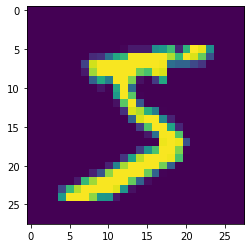

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

callbacks = myCallback()

import numpy as np
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(training_images[0])
training_images, test_images = training_images / 255.0, test_images / 255.0

#print(training_images[0])
#print(training_images[0])


  Flatten 0 just takes square image metr and turns it into a 1 dimensional set.

  Dense - adds a layer of neurons
  Dense implements the operation: 
  output = activation(dot(input, kernel) + bias) 
  where activation is the element-wise activation function passed 
  as the activation argument, 
  kernel is a weights matrix created by the layer, and 
  bias is a bias vector created by the layer 
  (only applicable if use_bias is True)
    check the help for details but output has dimensions [batch_size, d0, units]
  when input dimensions are [batch_size, d0, d1]
  so here the first argument is the the 'units'

  Softmax takes a set of values, and effectively picks the biggest one, so, 
  for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
  it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] 
  
  Relu = if x > 0 return x else return 0
  

In [ ]:
# build the model
# Sequential: That defines a SEQUENCE of layers in the neural network
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# then compile the model with a cost/loss function and an optimizer (gradient descent)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# finally train the model
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.2609 - accuracy: 0.9252
Reached 91% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9254


In [ ]:
model.evaluate(test_images, test_images)

313/313 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9561


[0.15204931795597076, 0.9560999870300293]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

[8.2145798e-06 4.4922959e-07 1.1958613e-04 1.2200705e-03 1.3919556e-08 3.1421845e-05 1.5166118e-09 9.9858427e-01 9.5289931e-07 3.5023393e-05]


The output of the model is a list of 10 numbers. 

These numbers are a probability that the value being classified is the corresponding value 

Check:
(https://github.com/zalandoresearch/fashion-mnist#labels).

The first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. 

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.
The rest are very low probabilities.

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Normalize a tensor image with mean and standard deviation. 

![Standardization](https://www.thoughtco.com/thmb/IuWRp3Yt6U06_Ditky8XbUKllnY=/768x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/zscore-56a8fa785f9b58b7d0f6e87b.GIF)

Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input torch.*Tensor 

i.e. output[channel] = (input[channel] - mean[channel]) / std[channel]

In [ ]:
print(torch.cuda.is_available()) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

False
cpu


In [ ]:
# Use standard FashionMNIST dataset
transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))
  ])

In [ ]:
train_set = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
test_set = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [ ]:
dataiter = iter(train_loader)
train_images, train_image_labels = dataiter.next()
print(train_images.shape)
print(train_image_labels.shape)
# print(train_images.squeeze().shape)
# print(train_images.squeeze().unsqueeze(1).shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


The shape of images is torch.Size([64,1,28,28]), 
which shows that there are 64 images in each batch and each image has a dimension of 28 x 28 pixels. 


---

Similarly, the labels have a shape as torch.Size([64]) as they are 64 images

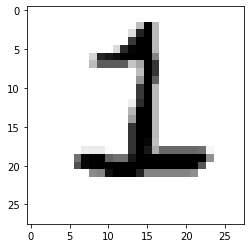

In [ ]:
plt.imshow(train_images[0].numpy().squeeze(), cmap='gray_r')

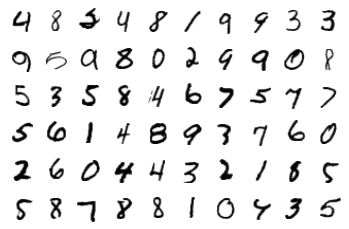

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(train_images[index].numpy().squeeze(), cmap='gray_r')

Flatten the input image into a 1 dimensionl tensor of 28*28 = 784 as we did in the Keras workflow above.

And define the model as we did for Keras (note the similarity!)

In [ ]:
input_size = 28*28
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


Together the LogSoftmax() +  NLLLoss() acts as the cross-entropy loss (note the similarity with the keras model above).

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
start_time = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for training_images, training_labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        training_images_flattened = training_images.view(training_images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        # returns y_pred
        predicted_labels = model(training_images_flattened)

        loss = criterion(predicted_labels, training_labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
      
print("\nTraining Time (in minutes) =",(time()-start_time)/60)

Epoch 0 - Training loss: 0.6528655251364972
Epoch 1 - Training loss: 0.2750895625826265
Epoch 2 - Training loss: 0.21424443395867912
Epoch 3 - Training loss: 0.17624764745312332
Epoch 4 - Training loss: 0.1475176887670115
Epoch 5 - Training loss: 0.12857872303893
Epoch 6 - Training loss: 0.11352135245797476
Epoch 7 - Training loss: 0.1011032414144036
Epoch 8 - Training loss: 0.0898470710109133
Epoch 9 - Training loss: 0.08215631945416141
Epoch 10 - Training loss: 0.07444131256106978
Epoch 11 - Training loss: 0.06846749580808795
Epoch 12 - Training loss: 0.06178702652674796
Epoch 13 - Training loss: 0.05727931846683817
Epoch 14 - Training loss: 0.053008729568632965

Training Time (in minutes) = 2.6279185016949973


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for test_images, test_labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        test_images_flattened = test_images.view(test_images.shape[0], -1)
        preds = model(test_images_flattened)
        _, predicted_labels = torch.max(preds.data, 1)
        total += test_labels.size(0)
        correct += (predicted_labels == test_labels).sum().item()
 
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Accuracy of the network on test images: 98.813 %
